# Assignment 4

# Part 1 - Installing, Importing and Preprocessing

In this assignment, we will analyze a corpus of 20 songs with their lyrics. It could be interesting to discover any potential differences between the trending most trending songs of 2013 and 2023, as this can demonstrate the shifts in trends and relevant topics in the music industry and society in general. The corpus consists of the top 10 songs of 2013 and the top 10 songs of 2023, according to Billboard. Before we proceed with investigating the differences, we will look at several spaCy text enrichment and annotation functions to see how they work. But first, we have to prepare this notebook by installing all the necessary libraries.

In [154]:
# Install and import spacy and plotly.
%pip install spaCy
%pip install plotly
%pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [155]:
# Import spacy
import spacy

# Install English language model
# %spacy download en_core_web_sm


# Import os to upload documents and metadata
import os

# Load spaCy visualizer
from spacy import displacy

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.graph_objects as go
import plotly.express as px

After we installed all essential libraries and packages, we need to create some space for the data to be stored in. 

In [156]:
# Create empty lists for file names and contents
texts = []
file_names = []

# Iterate through each file in the folder
for _file_name in os.listdir('txt_files'):
# Look for only text files
    if _file_name.endswith('.txt'):
    # Append contents of each text file to text list
        texts.append(open('txt_files' + '/' + _file_name, 'r', encoding='utf-8').read())
        # Append name of each file to file name list
        file_names.append(_file_name)

In [157]:
# Create dictionary object associating each file name with its text
d = {'Filename':file_names,'Text':texts}

In [158]:
# Turn dictionary into a dataframe
song_df = pd.DataFrame(d)

In [159]:
# Remove extra spaces from papers
song_df['Text'] = song_df['Text'].str.replace('\s+', ' ', regex=True).str.strip()

In [160]:
# Load metadata
metadata_df = pd.read_csv('metadata_songs.csv', sep = ';')

In [161]:
# Remove .txt from title of each paper
song_df['Filename'] = song_df['Filename'].str.replace('.txt', '', regex=True)
# Rename column from paper ID to Title
metadata_df.rename(columns={"File ID": "Filename"}, inplace=True)

In [162]:
metadata_df.head()
song_df.head()
# Merge metadata and papers into new DataFrame
# # Will only keep rows where both essay and metadata are present
final_song_df = metadata_df.merge(song_df,on='Filename')

In [163]:
# Print DataFrame
final_song_df.head()

,Filename,Song,Artist_s,Year,Genre,Text
0,Song_1_2013,Thrift Shop,Macklemore & Ryan Lewis featuring Wanz,2013,Hip Hop,"Hey, Macklemore! Can we go thrift shopping? Wh..."
1,Song_2_2013,Blurred Lines,Robin Thicke featuring T.I. and Pharrell Williams,2013,R&B/Pop,Everybody get up Everybody get up If you can't...
2,Song_3_2013,Radioactive,Imagine Dragons,2013,Rock,"Whoa, oh, oh Whoa, oh, oh Whoa, oh, oh Whoa I'..."
3,Song_4_2013,Can't Hold Us,Macklemore & Ryan Lewis featuring Ray Dalton,2013,Hip Hop,"Ay, ay, ay Good to see you, come on in, let's ..."
4,Song_5_2013,Mirrors,Justin Timberlake,2013,Pop,Aren't you somethin' to admire? 'Cause your sh...


# Part 2 - text enrichment

## Creating Doc objects 
Now that we have the data merged with the metadata and everything is running smoothly, we have to load one of spaCy’s Trained Models and Pipelines which will be used to perform tokenization, part-of-speech tagging, and other possible text manipulation tasks.

In [164]:
!python -m spacy download en_core_web_sm

# Load nlp pipeline
nlp = spacy.load('en_core_web_sm')

# Check what functions it performs
print(nlp.pipe_names)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.6 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


We can see that the pipeline is installed and works properly, as the output above lists the actions it performs. 

In [165]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [166]:
# Apply the function to the "Text" column, so that the nlp pipeline is called on each song
final_song_df['Doc'] = final_song_df['Text'].apply(process_text)

## Text reduction

### Tokenization

The next step is tokenization. To retrieve the tokens of everything in the DataFrame, we’ll use a function that iterates through any given doc object and returns all functions found within it.

In [167]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

# Run the token retrieval function on the doc objects in the dataframe
final_song_df['Tokens'] = final_song_df['Doc'].apply(get_token)
final_song_df.head()



,Filename,Song,Artist_s,Year,Genre,Text,Doc,Tokens
0,Song_1_2013,Thrift Shop,Macklemore & Ryan Lewis featuring Wanz,2013,Hip Hop,"Hey, Macklemore! Can we go thrift shopping? Wh...","(Hey, ,, Macklemore, !, Can, we, go, thrift, s...","[Hey, ,, Macklemore, !, Can, we, go, thrift, s..."
1,Song_2_2013,Blurred Lines,Robin Thicke featuring T.I. and Pharrell Williams,2013,R&B/Pop,Everybody get up Everybody get up If you can't...,"(Everybody, get, up, Everybody, get, up, If, y...","[Everybody, get, up, Everybody, get, up, If, y..."
2,Song_3_2013,Radioactive,Imagine Dragons,2013,Rock,"Whoa, oh, oh Whoa, oh, oh Whoa, oh, oh Whoa I'...","(Whoa, ,, oh, ,, oh, Whoa, ,, oh, ,, oh, Whoa,...","[Whoa, ,, oh, ,, oh, Whoa, ,, oh, ,, oh, Whoa,..."
3,Song_4_2013,Can't Hold Us,Macklemore & Ryan Lewis featuring Ray Dalton,2013,Hip Hop,"Ay, ay, ay Good to see you, come on in, let's ...","(Ay, ,, ay, ,, ay, Good, to, see, you, ,, come...","[Ay, ,, ay, ,, ay, Good, to, see, you, ,, come..."
4,Song_5_2013,Mirrors,Justin Timberlake,2013,Pop,Aren't you somethin' to admire? 'Cause your sh...,"(Are, n't, you, somethin', to, admire, ?, 'Cau...","[Are, n't, you, somethin', to, admire, ?, 'Cau..."


### Lemmatization
To prepare our corpus for further analysis, we can implement the lemmatization - retrieve the root word of each word in our dictionary. This will help us reduce the noise and look at the most essential parts of the texts, focusing on the meaning. The process is quite similar to tokenization.

In [168]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

# Run the lemma retrieval function on the doc objects in the dataframe
final_song_df['Lemmas'] = final_song_df['Doc'].apply(get_lemma)

In [169]:
print(f'"Love" appears in the text tokens column ' + str(final_song_df['Tokens'].apply(lambda x: x.count('love')).sum()) + ' times.')
print(f'"Love" appears in the lemmas column ' + str(final_song_df['Lemmas'].apply(lambda x: x.count('love')).sum()) + ' times.')

"Love" appears in the text tokens column 69 times.
"Love" appears in the lemmas column 72 times.


As we can see, there are more instances of “love” in the Lemmas column, as the lemmatization process has grouped different word forms  into the base word “love.”

## Text Annotation
### Part of Speech Tagging

In this part, we tag the parts of speech so that we can analyze our texts using this dimension later. 

In [170]:
# Define a function to retrieve lemmas from a doc object
def get_pos(doc):
    #Return the coarse- and fine-grained part of speech text for each token in the doc
    return [(token.pos_, token.tag_) for token in doc]

# Define a function to retrieve parts of speech from a doc object
final_song_df['POS'] = final_song_df['Doc'].apply(get_pos)

In [171]:
# Optionally, display the first few entries for verification
print(final_song_df['POS'].head())

0    [(INTJ, UH), (PUNCT, ,), (PROPN, NNP), (PUNCT,...
1    [(PRON, NN), (VERB, VBP), (ADP, RP), (PRON, NN...
2    [(INTJ, UH), (PUNCT, ,), (INTJ, UH), (PUNCT, ,...
3    [(INTJ, UH), (PUNCT, ,), (INTJ, UH), (PUNCT, ,...
4    [(AUX, VBP), (PART, RB), (PRON, PRP), (NOUN, N...
Name: POS, dtype: object


In [172]:
spacy.explain("IN")

'conjunction, subordinating or preposition'

In [173]:
# Define function to extract proper nouns from Doc object
def extract_proper_nouns(doc):
    return [token.text for token in doc if token.pos_ == 'PROPN']

# Apply function to Doc column and store resulting proper nouns in a new column
final_song_df['Proper_Nouns'] = final_song_df['Doc'].apply(extract_proper_nouns)

In [174]:
print(final_song_df.loc[[3,], 'Proper_Nouns'].head())

3    [Ha, Alright, Alright, Mack, Somewhere, Rocky,...
Name: Proper_Nouns, dtype: object


### Named Entity Recognition

To have an opportunity to analyze the 'real-world objects', we enable the name entity recognition. The otput of this part of code is supposed to be a text with the highlighted recognized words.

In [175]:
# Get all NE labels and assign to variable
labels = nlp.get_pipe("ner").labels

# Print each label and its description
for label in labels:
    print(label + ' : ' + spacy.explain(label))

CARDINAL : Numerals that do not fall under another type
DATE : Absolute or relative dates or periods
EVENT : Named hurricanes, battles, wars, sports events, etc.
FAC : Buildings, airports, highways, bridges, etc.
GPE : Countries, cities, states
LANGUAGE : Any named language
LAW : Named documents made into laws.
LOC : Non-GPE locations, mountain ranges, bodies of water
MONEY : Monetary values, including unit
NORP : Nationalities or religious or political groups
ORDINAL : "first", "second", etc.
ORG : Companies, agencies, institutions, etc.
PERCENT : Percentage, including "%"
PERSON : People, including fictional
PRODUCT : Objects, vehicles, foods, etc. (not services)
QUANTITY : Measurements, as of weight or distance
TIME : Times smaller than a day
WORK_OF_ART : Titles of books, songs, etc.


In [176]:
# Define function to extract named entities from doc objects
def extract_named_entities(doc):
    return [ent.label_ for ent in doc.ents]

# Apply function to Doc column and store resulting named entities in new column
final_song_df['Named_Entities'] = final_song_df['Doc'].apply(extract_named_entities)

In [177]:
# Define function to extract text tagged with named entities from doc objects
def extract_named_entities(doc):
    return [ent for ent in doc.ents]

# Apply function to Doc column and store resulting text in new column
final_song_df['NE_Words'] = final_song_df['Doc'].apply(extract_named_entities)
final_song_df['NE_Words']

0     [(8x), (badadada), (8x), (twenty, dollars), (N...
1     [(Hustle), (Leggo), (One), (Lemme), (Malibu), ...
2                                            [(Inhale)]
3     [(Mack), (Somewhere), (Rocky, and, Cosby), (Br...
4     [(the, other, half), (Comin), (two), (the, oth...
5              [(second), (second), (second), (second)]
6                     [(Take), (Take), (first), (Take)]
7     [(first), (South, Georgia), (Down), (Chevy), (...
8                                              [(Roar)]
9                 [(One), (two), (two), (three), (Ooh)]
10    [(Kinda), (Mm), (hours), (Ooh), (Started), (ho...
11    [(Girl), (Fanta), (Fanta), (Shawty), (Naim), (...
12                   [(one), (Love), (Love), (tonight)]
13                [(Midnights), (One, day), (One, day)]
14           [(tonight), (Baby), (Aah), (Keep), (Keep)]
15    [(Harry), (Holdin), (Gravity), (Answer), (Harr...
16    [(Mummy), (Mummy), (Ho, -, ee, -, oh, -, ee, -...
17    [(Baby), (', night), (Baby), (Baby), (', n

In [178]:
# Extract the first Doc object
doc = final_song_df['Doc'][3]

# Visualize named entity tagging in a single paper
displacy.render(doc, style='ent', jupyter=True)

As we can see, there are multiple highlighted words in the text. However, this output has a lot of mistakes, as some words are tagged incorrectly, e.g. some verbs and exclamations are seen as persons.

### Download Enriched Dataset

In [179]:
# Save CSV to the computer's working directory
final_song_df.to_csv('top_songs_with_spaCy_tags.csv')


#Read the CSV file into a DataFrame
file_path = 'top_songs_with_spaCy_tags.csv' 
df = pd.read_csv(file_path)

# Drop the column
# Replace 'column_to_remove' with the name of the column you want to remove
df = df.drop('Text', axis=1)

# Step 3: Overwrite the original CSV file with the modified DataFrame
df.to_csv(file_path, index=False)


# Part 3 - analyzing the corpus

This part investigates whether there are differences in trending topics in the top songs of 2013 and 2023. To assess that, we can use two popular music topics - love/relationship and fun/partying. First, we need to identify the possible keywords. I am adding the words that, from my observation, occur in popular songs often.  Then, we will use the product of tokenization performed earlier to count the occurrences and create visualizations.



In [180]:
love_keywords = ['love', 'heart', 'relationship', 'together', 'passion', 'affection', 'partner', 'kiss']
party_fun_keywords = ['party', 'dance', 'celebrate', 'fun', 'night', 'music', 'drink', 'club', 'live', 'free']


In [181]:
# Function to count occurrences of love-related keywords
def count_love_keywords(doc):
    return sum(token.text.lower() in love_keywords for token in doc)

# Apply the function to each song
final_song_df['Love_Keyword_Frequency'] = final_song_df['Doc'].apply(count_love_keywords)


In [182]:
# Aggregate keyword frequencies by year
love_keyword_by_year = final_song_df.groupby('Year')['Love_Keyword_Frequency'].sum()



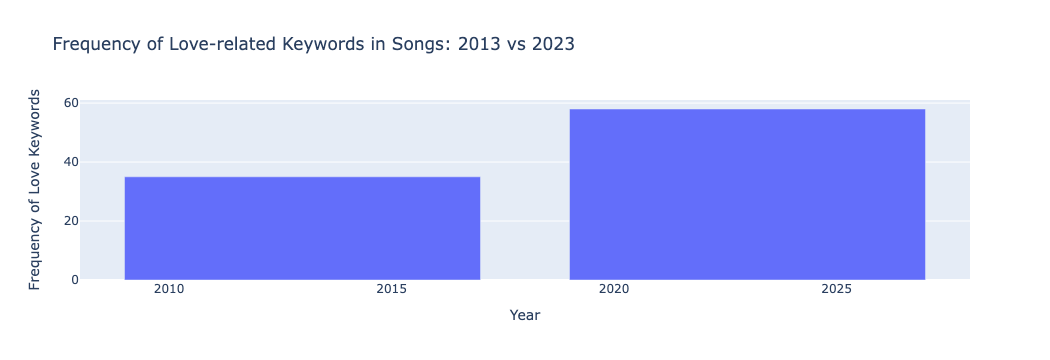

In [183]:
# Bar chart visualization
fig = px.bar(love_keyword_by_year, x=love_keyword_by_year.index, y='Love_Keyword_Frequency', title="Frequency of Love-related Keywords in Songs: 2013 vs 2023", labels={'Love_Keyword_Frequency':'Frequency of Love Keywords', 'Year':'Year'})
fig.show()


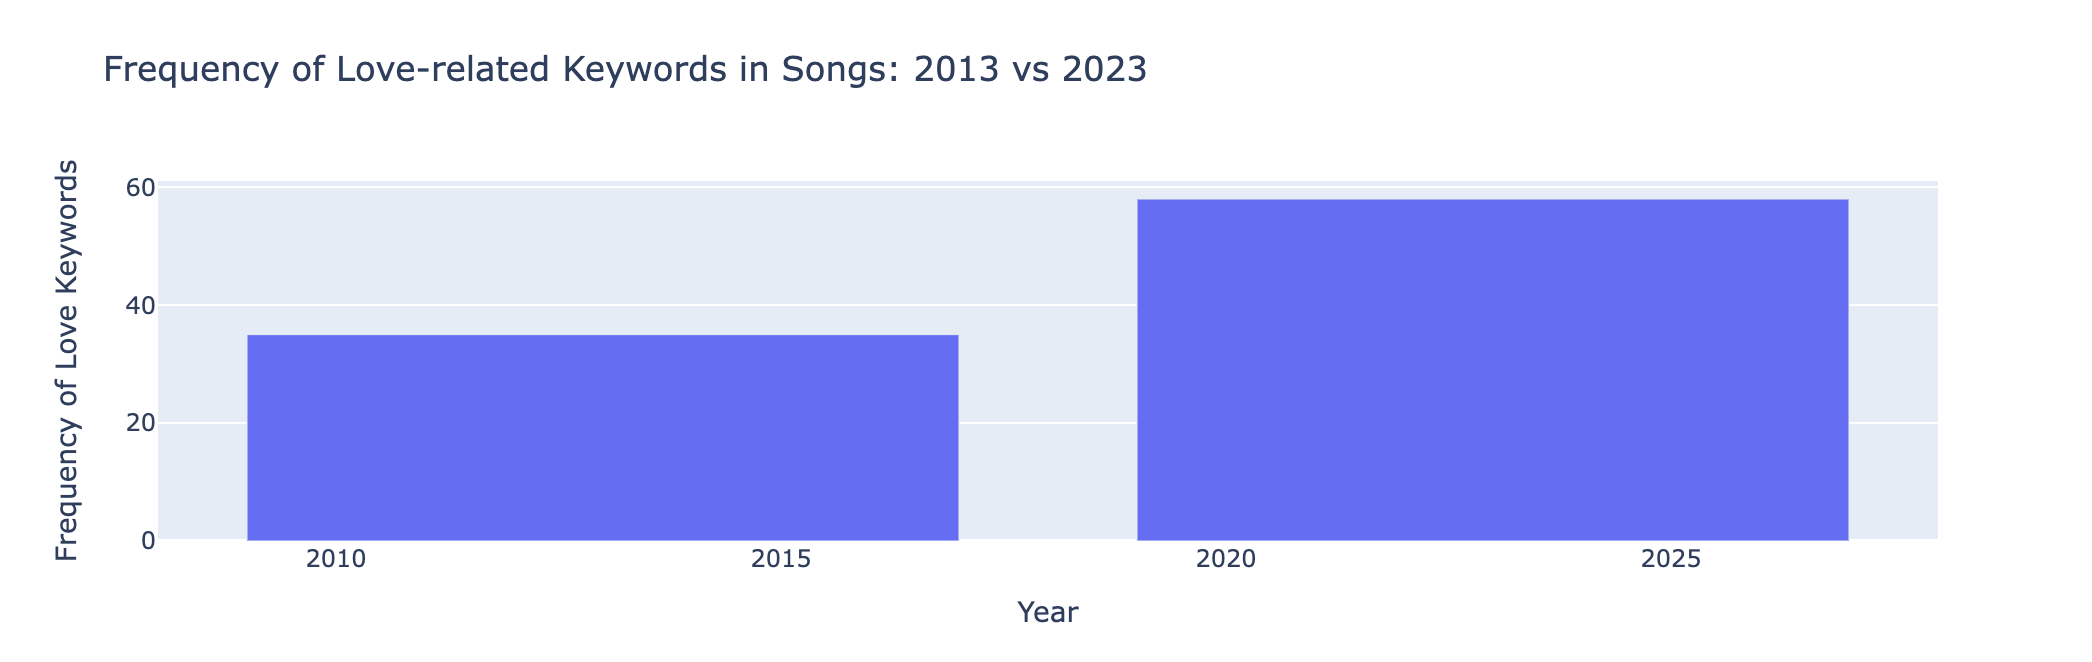

This barplot shows that in the period around 2013, the artists were singing less about love/relationship compared to 2023.

In [184]:
# Function to count occurrences of party and fun-related keywords
def count_party_fun_keywords(doc):
    return sum(token.text.lower() in party_fun_keywords for token in doc)

# Apply the function to each song
final_song_df['Party_Fun_Keyword_Frequency'] = final_song_df['Doc'].apply(count_party_fun_keywords)


In [185]:
# Aggregate keyword frequencies by year
party_fun_keyword_by_year = final_song_df.groupby('Year')['Party_Fun_Keyword_Frequency'].sum()


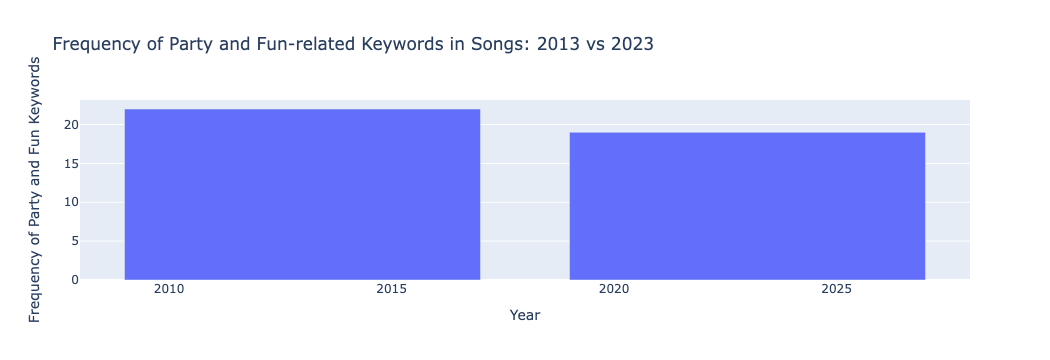

In [186]:
# Bar chart visualization
fig = px.bar(party_fun_keyword_by_year, x=party_fun_keyword_by_year.index, y='Party_Fun_Keyword_Frequency', title="Frequency of Party and Fun-related Keywords in Songs: 2013 vs 2023", labels={'Party_Fun_Keyword_Frequency':'Frequency of Party and Fun Keywords', 'Year':'Year'})
fig.show()


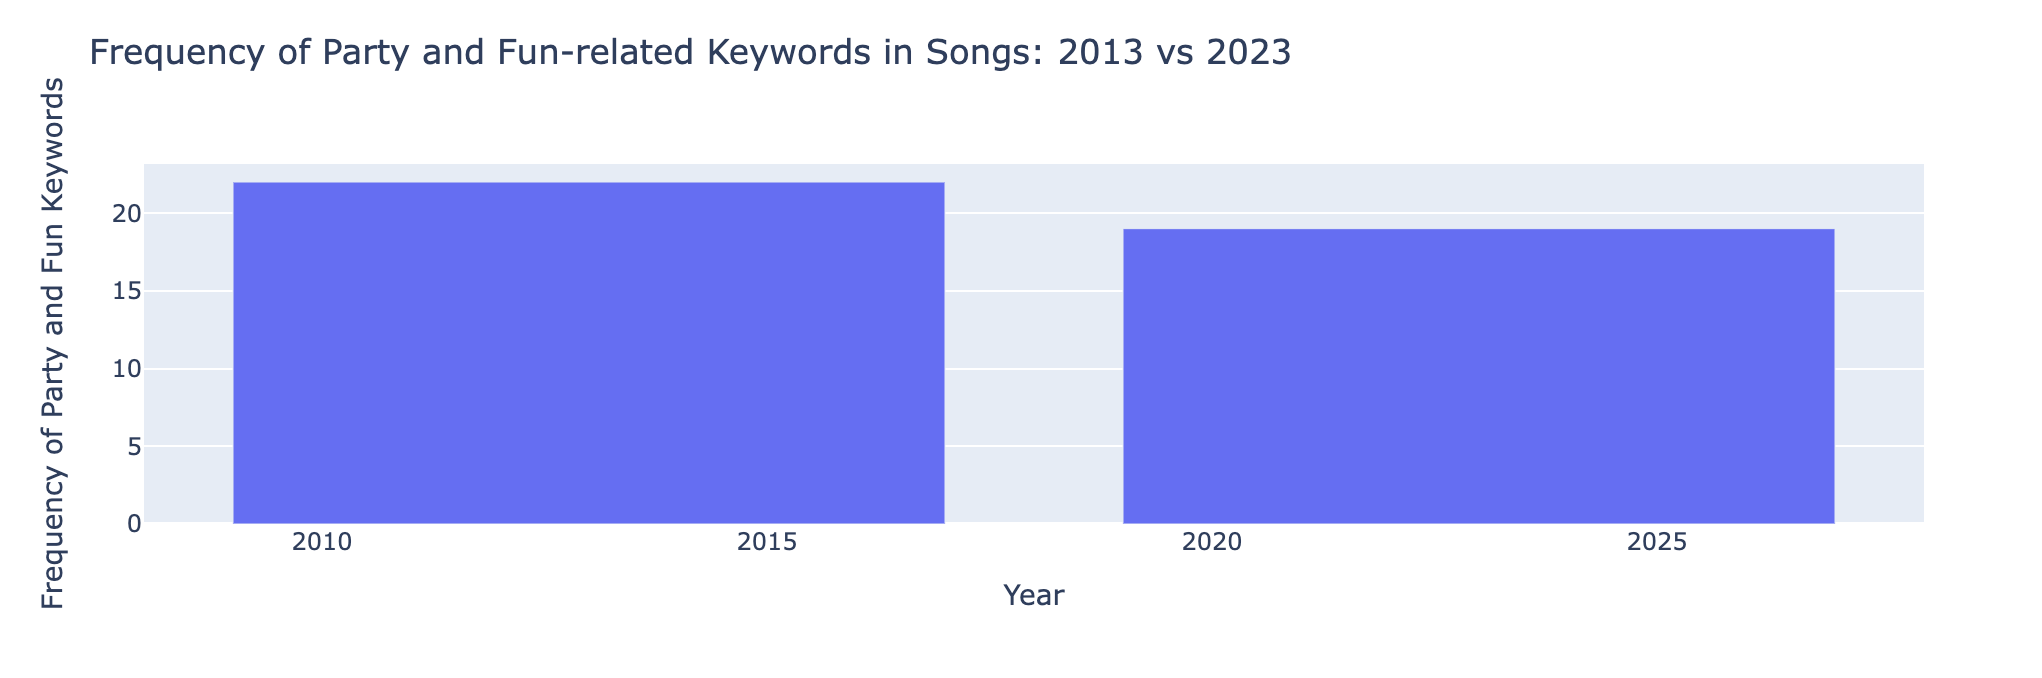

In this barplot, we can see that there is a small difference between the bar heights. 2013  songs had more fun- and party-related words than in 2023. However, this analysis comes with limitations. The keyword lists are not exhaustive, these were just two small sets of words that were related to the respective topics.